<a href="https://colab.research.google.com/github/zodplugin/PengolahanCitra/blob/main/M1_Pengolahan_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Convert Image To RGB

In [1]:
import matplotlib.pyplot as plt
import numpy
import colorsys
import cv2
import pandas as pd
from PIL import Image
im = Image.open('muhehe.png').convert("RGB")
image = im.resize((250, 300))
pixels = list(image.getdata())

In [2]:
output = pd.DataFrame(pixels)
df = output.rename(columns={0: 'Red',1 : "Green", 2: "Blue"})
df

,Red,Green,Blue
0,232,85,94
1,231,84,93
2,232,85,94
3,232,85,94
4,233,86,95
...,...,...,...
74995,233,86,95
74996,232,85,94
74997,232,85,94
74998,232,85,94


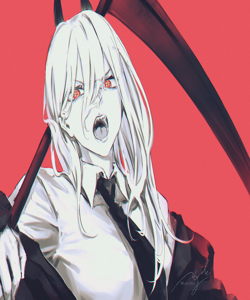

In [3]:
image

## 2. Show Histogram Value From Image

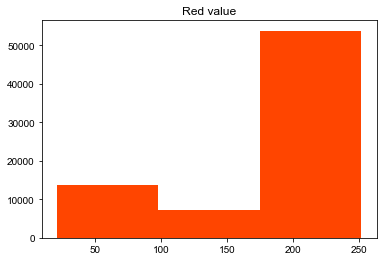

In [4]:
# Set title
plt.title("Red value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Red"], color = "orangered", bins=3)
plt.show()

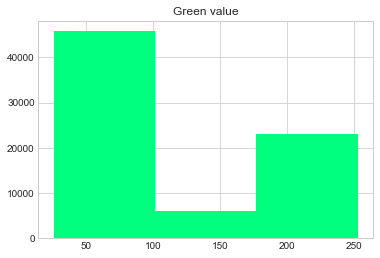

In [5]:
# Set title
plt.title("Green value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Green"], color="springgreen", bins=3)
plt.show()

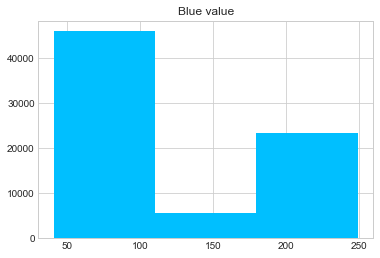

In [6]:
# Set title
plt.title("Blue value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Blue"], color="deepskyblue", bins=3)
plt.show()

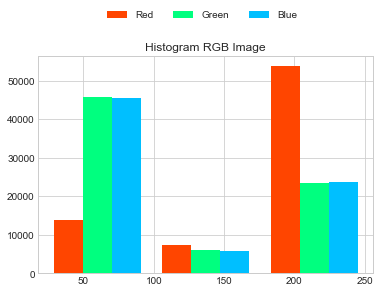

In [7]:
# Set title
plt.title("Histogram RGB Image")
plt.style.use('seaborn-whitegrid')
plt.hist(df, color=["orangered", "springgreen", "deepskyblue"], bins=3, label=["Red","Green","Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()


In [8]:
# Tampilkan nilai R , G , B
def get_value(list, value):
    for i in range(0, 256):
        temp = 0
        for j in list:
            if j == i:
                temp += 1
        value.append(temp)

In [9]:
def rgb_to_grayscale(width, height,pixel_map, image):
    for i in range(width):
        for j in range(height):

            # getting the RGB pixel value.
            r, g, b = image.getpixel((i, j))

            # Apply formula of grayscale:
            grayscale = (0.299*r + 0.587*g + 0.114*b)

            # setting the pixel value.
            pixel_map[i, j] = (int(grayscale), int(grayscale), int(grayscale))
    
    image.save("muhehe_grayscale.png", format="png")

In [10]:
def minmaxscaler(min, max, list, result):
    for i in list:
        result.append((i-min)/(max-min))

In [11]:
im_grey = Image.open('muhehe.png').convert("RGB")

image_grey = im_grey.resize((250, 300))

# Extracting pixel map:
pixel_map = image_grey.load()

# Extracting the width and height
# of the image:
width, height = image_grey.size

rgb_to_grayscale(width, height, pixel_map, image_grey)

pixels_grey  = list(image_grey.getdata())

output_grey = pd.DataFrame(pixels_grey)
df_grey = output_grey.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})
df_grey


,Red,Green,Blue
0,129,129,129
1,128,128,128
2,129,129,129
3,129,129,129
4,130,130,130
...,...,...,...
74995,130,130,130
74996,129,129,129
74997,129,129,129
74998,129,129,129


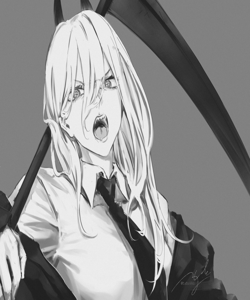

In [12]:
image_grey

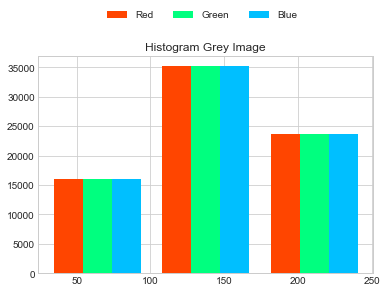

In [13]:
# Set title
plt.title("Histogram Grey Image")
plt.style.use('seaborn-whitegrid')
plt.hist(df_grey, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()


In [26]:
img = cv2.imread('muhehe.png')

img_1 = cv2.resize(img, (250, 300))

img_normalized = cv2.normalize(img_1, None, 0, 1.0,
                               cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Window name in which image is displayed
window_name = 'image'

# Using cv2.imshow() method
# Displaying the image
cv2.imshow(window_name, img_normalized)

# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)

# closing all open windows
cv2.destroyAllWindows()

In [25]:
list = []

for i in img_normalized:
    for j in i:
        list.append(j)


output_norm = pd.DataFrame(list)
df_norm = output_norm.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})
df_norm


,Red,Green,Blue
0,0.309735,0.269911,0.920354
1,0.336283,0.296460,0.946903
2,0.327434,0.287611,0.938053
3,0.327434,0.287611,0.938053
4,0.327434,0.287611,0.938053
...,...,...,...
74995,0.336283,0.296460,0.946903
74996,0.327434,0.287611,0.938053
74997,0.314159,0.274336,0.924779
74998,0.309735,0.269911,0.920354


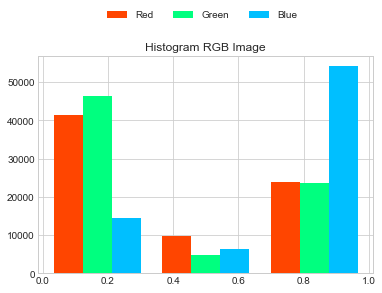

In [27]:
# Set title
plt.title("Histogram RGB Image")
plt.style.use('seaborn-whitegrid')
plt.hist(df_norm, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

In [28]:
value_r = []
value_g = []
value_b = []

greyscale_r = []
greyscale_g = []
greyscale_b = []

value_r_norm = []
value_g_norm = []
value_b_norm = []

# RGB
# get value red
get_value(df["Red"], value_r)
# get value blue
get_value(df["Green"], value_g)
# get value red
get_value(df["Blue"], value_b)

# Grayscale
# get value red
get_value(df_grey["Red"], greyscale_r)
# get value blue
get_value(df_grey["Green"], greyscale_g)
# get value red
get_value(df_grey["Blue"], greyscale_b)

# Norm
get_value(df_norm["Red"], value_r_norm)
# get value blue
get_value(df_norm["Green"], value_g_norm)
# get value red
get_value(df_norm["Blue"], value_b_norm)

show_hist = pd.DataFrame()

show_hist.insert(0, "Red", value_r)

show_hist.insert(1, "Green", value_g)

show_hist.insert(2, "Blue", value_b)

show_hist.insert(3, "G. Red", greyscale_r)

show_hist.insert(4, "G. Green", greyscale_g)

show_hist.insert(5, "G. Blue", greyscale_b)

show_hist.insert(6, "Red Norm", value_r_norm)

show_hist.insert(7, "Green Norm", value_g_norm)

show_hist.insert(8, "Blue Norm", value_g_norm)

show_hist


,Red,Green,Blue,G. Red,G. Green,G. Blue,Red Norm,Green Norm,Blue Norm
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,5,5
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
251,0,0,0,0,0,0,0,0,0
252,1,1,0,0,0,0,0,0,0
253,0,1,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0
